In [86]:
import numpy as np
from matplotlib import pyplot as plt
import astropy
import scipy

In [61]:
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['axes.grid'] = True

## On-Off Spectra

In [62]:
on_line = np.load('data/on_line.npy')
off_line = np.load('data/off_line.npy')

In [63]:
def calc_avg_power_fft(data):
    fft = np.fft.fft(data)
    pow_data = np.abs(fft)**2
    avg_data = np.mean(pow_data, axis=0)
    return np.fft.fftshift(avg_data)

def calc_median_power_fft(data):
    fft = np.fft.fft(data)
    pow_data = np.abs(fft)**2
    avg_data = np.median(pow_data, axis=0)
    return np.fft.fftshift(avg_data)

def calc_freq(samples, frequency):
    return np.fft.fftshift(np.fft.fftfreq(samples, d=1/frequency))

In [64]:
on_line.shape

(20000, 2048)

In [65]:
off_line.shape

(2048,)

(900, 1050)

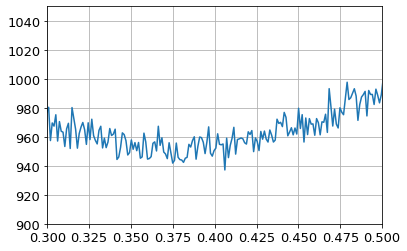

In [66]:
avg_fft = calc_avg_power_fft(on_line)
freq = calc_freq(samples=2048, frequency=2.2)
plt.plot(freq, avg_fft)
plt.xlim(0.3,0.5)
plt.ylim(900,1050)

In [67]:
avg_fft.shape

(2048,)

(950, 1050)

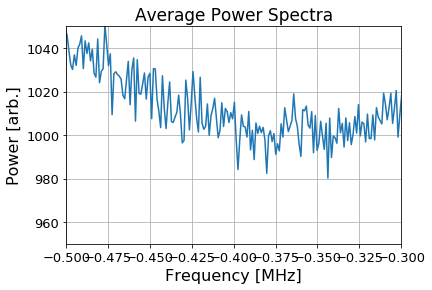

In [68]:
plt.plot(freq, np.fft.fftshift(off_line))
plt.title("Average Power Spectra")
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arb.]')
plt.xlim(-0.5,-0.3)
plt.ylim(950,1050)

## Correct data!

## Line Shape

In [69]:
on_line_blocks = np.load('data/on_line_raw.npy')
off_line_blocks = np.load('data/off_line_raw.npy')
on_line_pow_avg = np.load('data/on_line_pow_avg.npy')
off_line_pow_avg = np.load('data/off_line_pow_avg.npy')

# Raspberry Pi 2.2 MHz 2048 samples 
# 3:30pm zenith off/on
# on center frequency 1420 MHz, off center 1420.8 MHz
# 3:50pm blackbody observations

(-0.85, 0.85)

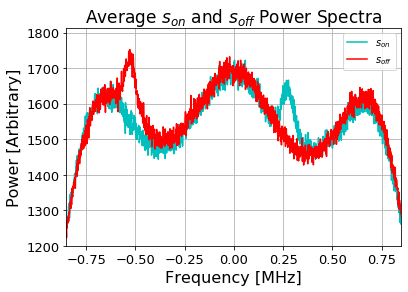

In [70]:
s_on = calc_avg_power_fft(on_line_blocks)
s_off = calc_avg_power_fft(off_line_blocks)
freq = calc_freq(samples=2048, frequency=2.2)
plt.plot(freq, s_on, label='$s_{on}$', color='c')
plt.plot(freq, s_off, label='$s_{off}$', color='r')
plt.legend()
plt.title('Average $s_{on}$ and $s_{off}$ Power Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')
plt.ylim(1200,)
plt.xlim(-0.85, 0.85)

(-0.85, 0.85)

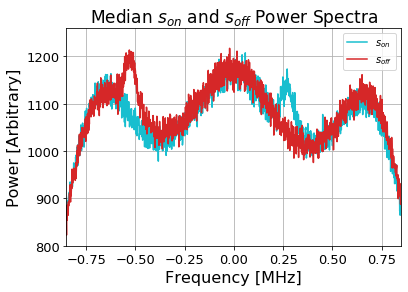

In [71]:
s_on = calc_median_power_fft(on_line_blocks)
s_off = calc_median_power_fft(off_line_blocks)
freq = calc_freq(samples=2048, frequency=2.2)
plt.plot(freq, s_on, label='$s_{on}$', color='C9')
plt.plot(freq, s_off, label='$s_{off}$', color='C3')
plt.legend()
plt.title('Median $s_{on}$ and $s_{off}$ Power Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')
plt.ylim(800,)
plt.xlim(-0.85, 0.85)

### Smoothed Spectra

(-0.85, 0.85)

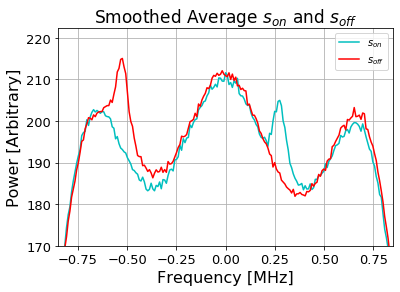

In [72]:
s_on_smooth = calc_avg_power_fft(on_line_blocks.reshape((-1,256)))
s_off_smooth = calc_avg_power_fft(off_line_blocks.reshape((-1,256)))
freq = calc_freq(samples=256, frequency=2.2)
plt.plot(freq, s_on_smooth, label='$s_{on}$', color='c')
plt.plot(freq, s_off_smooth, label='$s_{off}$', color='r')
plt.legend()
plt.title('Smoothed Average $s_{on}$ and $s_{off}$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')
plt.ylim(170,)
plt.xlim(-0.85, 0.85)

(-0.85, 0.85)

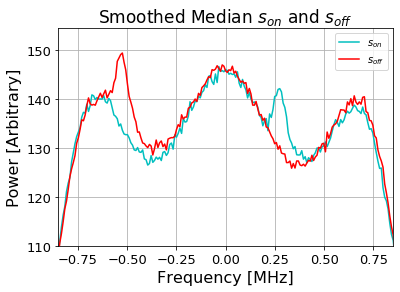

In [73]:
s_on_smooth = calc_median_power_fft(on_line_blocks.reshape((-1,256)))
s_off_smooth = calc_median_power_fft(off_line_blocks.reshape((-1,256)))
freq = calc_freq(samples=256, frequency=2.2)
plt.plot(freq, s_on_smooth, label='$s_{on}$', color='c')
plt.plot(freq, s_off_smooth, label='$s_{off}$', color='r')
plt.legend()
plt.title('Smoothed Median $s_{on}$ and $s_{off}$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')
plt.ylim(110,)
plt.xlim(-0.85, 0.85)

No handles with labels found to put in legend.


Text(0, 0.5, 'Power [Arbitrary]')

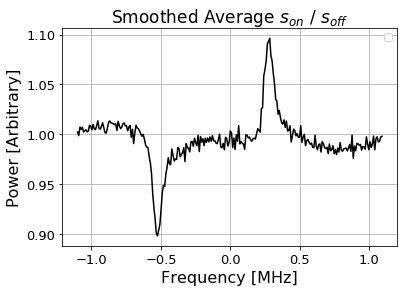

In [74]:
s_on_smooth = calc_avg_power_fft(on_line_blocks.reshape((-1,256)))
s_off_smooth = calc_avg_power_fft(off_line_blocks.reshape((-1,256)))
freq = calc_freq(samples=256, frequency=2.2)
plt.plot(freq, s_on_smooth/s_off_smooth, color='black')
plt.legend()
plt.title('Smoothed Average $s_{on}$ / $s_{off}$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')

Text(0, 0.5, 'Power [Arbitrary]')

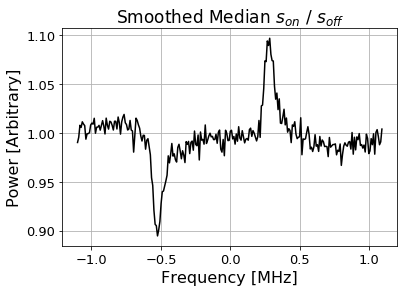

In [75]:
s_on_smooth = calc_median_power_fft(on_line_blocks.reshape((-1,256)))
s_off_smooth = calc_median_power_fft(off_line_blocks.reshape((-1,256)))
freq = calc_freq(samples=256, frequency=2.2)
plt.plot(freq, s_on_smooth/s_off_smooth, color='black')
# plt.legend()
plt.title('Smoothed Median $s_{on}$ / $s_{off}$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')

In [76]:
on_line_pow_avg.shape

(2048,)

## Line Intensity

In [77]:
scal = np.load('data/cal_raw_zenith.npy')
scold = np.load('data/cold_raw_zenith.npy')
scold.shape

(1000, 2048)

In [78]:
Tcal = 300 #K
scal_power = calc_avg_power_fft(scal)
scold_power = calc_avg_power_fft(scold)

G = Tcal / np.mean((scal_power[400:1200] - scold_power[400:1200]))

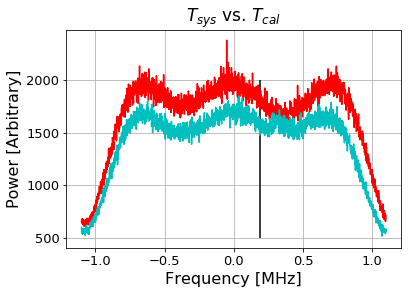

In [79]:
freq = calc_freq(samples=2048, frequency=2.2)
plt.plot(freq, scal_power, label='blackbody', color='red')
plt.plot(freq, scold_power, label='sky', color='c')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [Arbitrary]')
plt.title('$T_{sys}$ vs. $T_{cal}$')
plt.vlines(freq[1200], 500, 2000)

In [80]:
print('Calibrated value of G:', G)

Calibrated value of G: 1.1317778833986076


Text(0, 0.5, '$T_{line}$ [Arbitrary]')

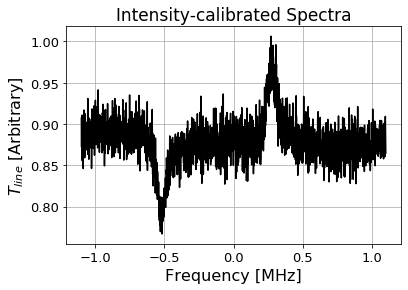

In [81]:
sline = s_on / s_off
Tline = sline / G
# freq = calc_freq(samples=256, frequency=2.2)
plt.plot(freq, Tline, color='black')
plt.title('Intensity-calibrated Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('$T_{line}$ [Arbitrary]')

Text(0, 0.5, '$T_{line}$ [Arbitrary]')

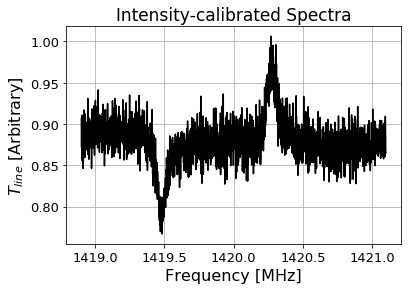

In [82]:
sline = s_on / s_off
Tline = sline / G
# freq = calc_freq(samples=256, frequency=2.2)
plt.plot(freq + 1420, Tline, color='black')
plt.title('Intensity-calibrated Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('$T_{line}$ [Arbitrary]')

## Doppler Shift

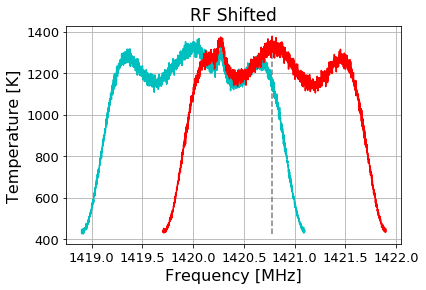

In [83]:
sline = s_on / s_off
Tline = sline / G
freq = calc_freq(samples=2048, frequency=2.2)
# freq = calc_freq(samples=256, frequency=2.2)
plt.plot(freq + 1420, s_on * G, color='c')
plt.plot(freq + 1420.8, s_off * G, color='red')
plt.title('RF Shifted')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
# plt.ylim(1600,2100)
# plt.xlim(1419.3, 1421.3)

nu = freq[np.argmax(s_off)] + 1420.8
plt.vlines(nu, min(s_on*G), max(s_on*G), color='gray',linestyle='--')

[ 318.03587397  317.80899119  317.5821084  ... -145.93942317 -146.16630596
 -146.39318875]


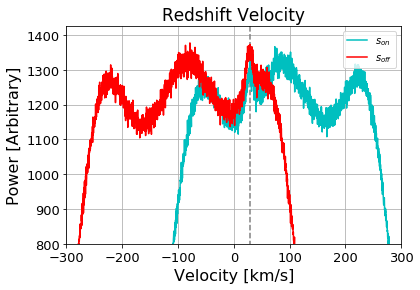

In [139]:
c = 3 * 10**5 # km/s
nu0 = 1420.4058
v_on = -c * (freq + 1420 - nu0) / nu0
v_off = -c * (freq + 1420.8 - nu0) / nu0
plt.plot(v_on, s_on * G, color='c', label='$s_{on}$')
plt.plot(v_off, s_off * G, color='red', label='$s_{off}$')
plt.ylim(800,)
plt.xlim(-300,300)
doppler_v = v_off[np.argmax(s_off[:800])]
# plt.plot(s_off[800:])
plt.vlines(doppler_v, 200, 1600, color='gray', linestyle='--')
# np.argmax(s_off[1200:])
plt.xlabel('Velocity [km/s]')
plt.ylabel('Power [Arbitrary]')
plt.title('Redshift Velocity')
plt.legend(loc='upper right')
print(v_on)

In [135]:
nu0 = 1420.4058
delta_nu = nu - nu0
c = 3 * 10**5 # km/s
velocity = - c * delta_nu / nu0
print('Velocity of the Hydrogen:', doppler_v, 'km/s')

Velocity of the Hydrogen: 28.822199085631823 km/s
